In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Đọc dữ liệu 

In [73]:
red_wine=pd.read_csv('./wine+quality/winequality-red.csv',sep=';')
white_wine=pd.read_csv('./wine+quality/winequality-white.csv',sep=';')

In [74]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Gộp 2 bộ dữ liệu này lại và reset index**

In [76]:
data=pd.concat([red_wine,white_wine],axis=0).reset_index(drop=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2) Thống kê số lượng nhãn, số lượng thuộc tính và phân bố dữ liệu theo nhãn.

In [77]:
print('Số lượng nhãn',data['quality'].nunique())
print('Nhãn:',data['quality'].unique())

Số lượng nhãn 7
Nhãn: [5 6 7 4 8 3 9]


In [78]:
print('Số lượng thuộc tính',data.shape[1])
print('Thống kê dữ liệu:')
data.describe()

Số lượng thuộc tính 12
Thống kê dữ liệu:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [79]:
print('Phân bố dữ liệu theo nhãn')
(data['quality'].value_counts()/data.shape[0]*100).to_frame().T

Phân bố dữ liệu theo nhãn


quality,6,5,7,4,8,3,9
count,43.650916,32.907496,16.607665,3.324611,2.970602,0.461752,0.076959


# 3) Chuẩn bị dữ liệu: phân chia dữ liệu ban đầu thành 2 tập: huấn luyện (train) và kiểm thử (test) với tỉ lệ 8-2.

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X=data.drop(['quality'],axis=1)
y=data['quality']

**Trong lúc thống kê nhãn ta thấy dữ liệu bị mất cân bằng trầm trọng nên ta sẽ resample dữ liệu lại bằng SMOTE**

In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,k_neighbors=3)

In [83]:
X_res, y_res = sm.fit_resample(X, y)

**Dữ liệu sau khi resample**

In [84]:
(y_res.value_counts()/y_res.shape[0]*100).to_frame().T

quality,5,6,7,4,8,3,9
count,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=22)

# 4) Cài đặt mô hình: kNN và SVM. Sử dụng kỹ thuật cross validation.

**Dùng GridSearchCV để tìm ra tham số tốt nhất cho mô hình**

In [86]:
from sklearn.model_selection  import GridSearchCV

## KNN

In [87]:
from  sklearn.neighbors import KNeighborsClassifier

In [88]:
param_grid_knn = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    
}
knn=KNeighborsClassifier()

In [89]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5,n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [90]:
print('Tham số tốt nhất:',grid_search_knn.best_params_)
print('Độ chính xác trên tập train:',grid_search_knn.best_score_)

Tham số tốt nhất: {'n_neighbors': 3, 'weights': 'distance'}
Độ chính xác trên tập train: 0.844090455723561


In [91]:
final_knn_model=grid_search_knn.best_estimator_

## SVM

In [92]:
from  sklearn.svm import SVC

In [93]:
param_grid_svm = {
    'C': [0.1,1, 10,100],
    'gamma': [1,0.1,0.01, 0.001]
}
svm_model=SVC()

In [94]:
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5,n_jobs=-1,)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [95]:
print('Tham số tốt nhất:',grid_search_svm.best_params_)
print('Độ chính xác trên tập train:',grid_search_svm.best_score_)

Tham số tốt nhất: {'C': 100, 'gamma': 0.1}
Độ chính xác trên tập train: 0.8643035308090502


In [96]:
final_svm_model=grid_search_svm.best_estimator_

# 5) Đánh giá mô hình: Độ chính xác (Accuracy) Ma trận nhầm lẫn (Confusion matrix).

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix

## KNN

accuracy_score KNN: 0.865776882397381
confusion_matrix KNN:


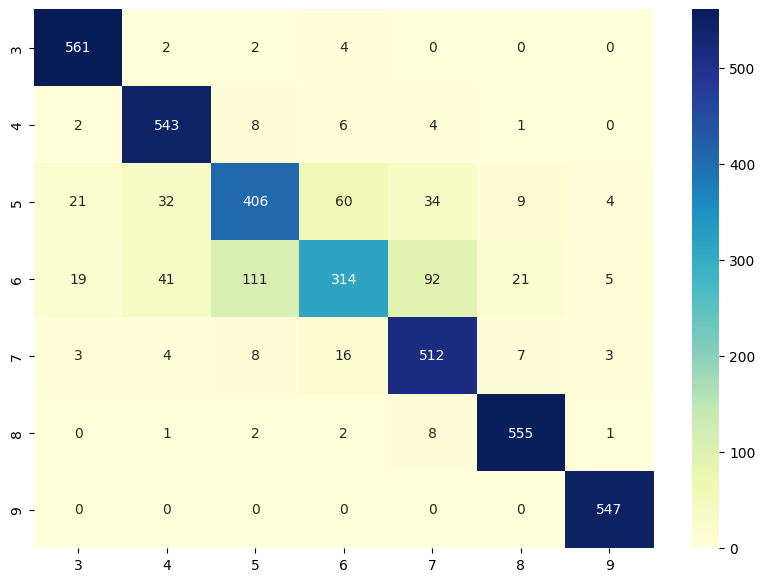

In [98]:
y_pred_knn=final_knn_model.predict(X_test)
print('accuracy_score KNN:',accuracy_score(y_test,y_pred_knn))
print('confusion_matrix KNN:')
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),xticklabels=final_knn_model.classes_,yticklabels=final_knn_model.classes_,annot=True,fmt='d',cmap='YlGnBu')
plt.show()


## SVM

accuracy_score SVM: 0.8851674641148325
confusion_matrix SVM:


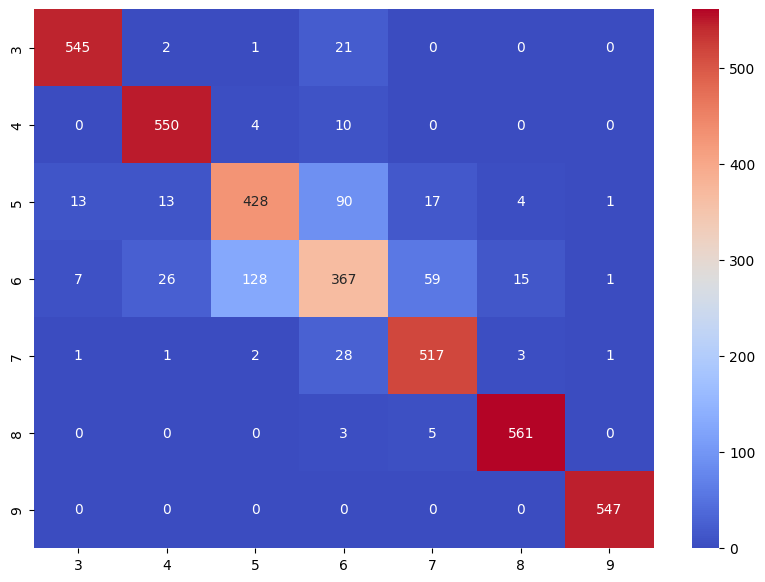

In [99]:
y_pred_svm=final_svm_model.predict(X_test)
print('accuracy_score SVM:',accuracy_score(y_test,y_pred_svm))
print('confusion_matrix SVM:')
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,fmt='d',cmap='coolwarm',xticklabels=final_svm_model.classes_,yticklabels=final_svm_model.classes_)
plt.show()

## 6) Có nhận xét gì về hiệu quả giữa 2 mô hình?

**SVM và KNN đều cho kết quả cao chính xác trên 0.8 ơr tập test điều này đạt được vì chúng ta dã resample dữ liệu nên các lớp dữ liệu đã đồng đều và không còn trường hợp thiên vị**

# 7) Cài đặt thêm 2 thuật toán: Linear Discriminant Analysis (LDA) và Random Forest (RF). So sánh kết quả giữa 4 mô hình với nhau.

## LDA

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [112]:
param_grid_lda = {
    'solver': ['svd', 'lsqr']
}
lda_model=LinearDiscriminantAnalysis()

In [113]:
grid_search_lda = GridSearchCV(lda_model, param_grid_lda, cv=15,n_jobs=-1)
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr']})

In [114]:
print('Tham số tốt nhất:',grid_search_lda.best_params_)
print('Độ chính xác trên tập train:',grid_search_lda.best_score_)

Tham số tốt nhất: {'solver': 'svd'}
Độ chính xác trên tập train: 0.4885084369996305


In [115]:
final_lda_model=grid_search_lda.best_estimator_

accuracy_score LDA: 0.4872828003021909
confusion_matrix LDA:


<Axes: >

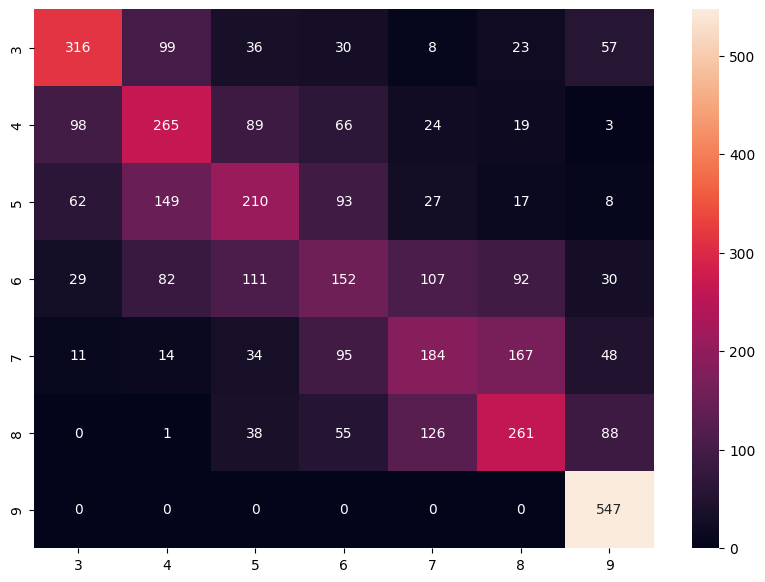

In [116]:
y_pred_lda=final_lda_model.predict(X_test)
print('accuracy_score LDA:',accuracy_score(y_test,y_pred_lda))
print('confusion_matrix LDA:')
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred_lda),annot=True,fmt='d',xticklabels=final_lda_model.classes_,yticklabels=final_lda_model.classes_)

## RF

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
param_grid_rf = {
    'n_estimators': [100,200,300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5, 7,9,11],
}
rf_model=RandomForestClassifier()

In [124]:
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5,n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 200, 300]})

In [125]:
print('Tham số tốt nhất:',grid_search_rf.best_params_)
print('Độ chính xác trên tập train:',grid_search_rf.best_score_)

Tham số tốt nhất: {'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 300}
Độ chính xác trên tập train: 0.837856932184966


accuracy_score Random Forest: 0.8436162175774364
confusion_matrix Random Forest:


<Axes: >

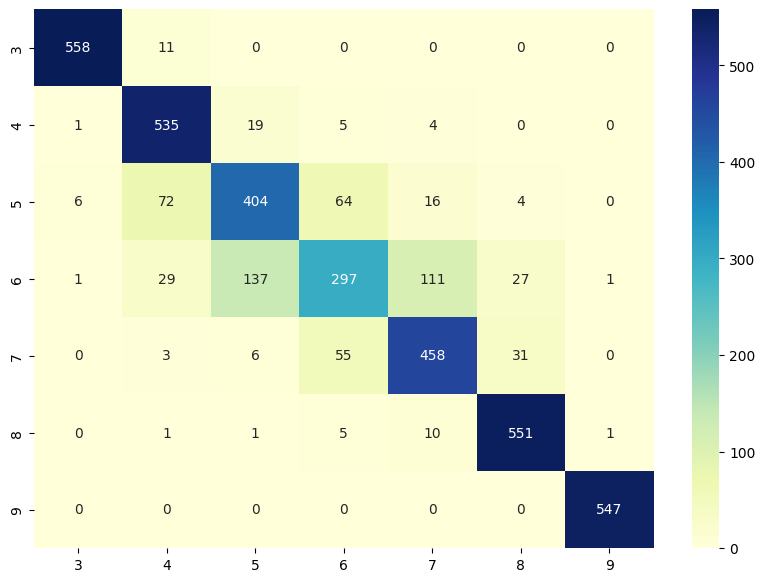

In [126]:
final_rf_model=grid_search_rf.best_estimator_
y_pred_rf=final_rf_model.predict(X_test)
print('accuracy_score Random Forest:',accuracy_score(y_test,y_pred_rf))
print('confusion_matrix Random Forest:')
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='d',cmap='YlGnBu',xticklabels=final_rf_model.classes_,yticklabels=final_rf_model.classes_)

## So sánh kết quả 4 mô hình

In [127]:
print('Độ chính xác của các mô hình giảm dần từ trái sang phải:')
y_preds=[y_pred_knn,y_pred_svm,y_pred_lda,y_pred_rf]
models=['KNN','SVM','LDA','Random Forest']
pd.Series([accuracy_score(y_test,y_pred) for y_pred in y_preds],index=models).sort_values(ascending=False).to_frame().T

Độ chính xác của các mô hình giảm dần từ trái sang phải:


,SVM,KNN,Random Forest,LDA
0,0.885167,0.865777,0.843616,0.487283
